In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = Path(r"C:\Users\lmeji\Desktop\Project_branch\Investing_Analysis\Resources\Gas price by Region.csv")
data_df = pd.read_csv(data)
data_df.head()

,Date,TX,NY,FL,CO,CA,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,8/15/2022,3.476,4.273,3.661,4.031,5.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/8/2022,3.583,4.360,3.787,4.219,5.298,215674.0,4155.93,4186.62,4128.97,4140.06,3.604650e+09,4140.06,4.038
2,8/1/2022,3.735,4.460,3.965,4.454,5.472,220316.0,4112.38,4144.95,4096.02,4118.63,3.540960e+09,4118.63,4.192
3,7/25/2022,3.871,4.543,4.120,4.677,5.573,225294.0,3965.72,3975.30,3943.46,3966.84,2.988650e+09,3966.84,4.330
4,7/18/2022,4.038,4.639,4.283,4.874,5.708,225131.0,3883.79,3902.44,3818.63,3830.85,3.414470e+09,3830.85,4.490


In [3]:
print(data_df.shape)

(1159, 14)


In [4]:
data_df.dtypes

Date                     object
TX                      float64
NY                      float64
FL                      float64
CO                      float64
CA                      float64
Gasoline_stock_price    float64
GSPC_Open               float64
GSPC_High               float64
GSPC_Low                float64
GSPC_Close              float64
GSPC_Volume             float64
GSPC_Adjusted           float64
Gas_Price               float64
dtype: object

In [5]:
#Remove rows that have at least 1 null value.

new_data = data_df.dropna()

#Check the dataset shape and head to make sure the nulls were removed

print(new_data.shape)

new_data.head()

(907, 14)


,Date,TX,NY,FL,CO,CA,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
1,8/8/2022,3.583,4.360,3.787,4.219,5.298,215674.0,4155.93,4186.62,4128.97,4140.06,3.604650e+09,4140.06,4.038
2,8/1/2022,3.735,4.460,3.965,4.454,5.472,220316.0,4112.38,4144.95,4096.02,4118.63,3.540960e+09,4118.63,4.192
3,7/25/2022,3.871,4.543,4.120,4.677,5.573,225294.0,3965.72,3975.30,3943.46,3966.84,2.988650e+09,3966.84,4.330
4,7/18/2022,4.038,4.639,4.283,4.874,5.708,225131.0,3883.79,3902.44,3818.63,3830.85,3.414470e+09,3830.85,4.490
5,7/11/2022,4.250,4.743,4.421,4.959,5.903,228435.0,3880.94,3880.94,3847.22,3854.43,3.023830e+09,3854.43,4.646


In [23]:
new_data.head(10)

,Date,TX,NY,FL,CO,CA,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
1,8/8/2022,3.583,4.360,3.787,4.219,5.298,215674.0,4155.93,4186.62,4128.97,4140.06,3.604650e+09,4140.06,4.038
2,8/1/2022,3.735,4.460,3.965,4.454,5.472,220316.0,4112.38,4144.95,4096.02,4118.63,3.540960e+09,4118.63,4.192
3,7/25/2022,3.871,4.543,4.120,4.677,5.573,225294.0,3965.72,3975.30,3943.46,3966.84,2.988650e+09,3966.84,4.330
4,7/18/2022,4.038,4.639,4.283,4.874,5.708,225131.0,3883.79,3902.44,3818.63,3830.85,3.414470e+09,3830.85,4.490
5,7/11/2022,4.250,4.743,4.421,4.959,5.903,228435.0,3880.94,3880.94,3847.22,3854.43,3.023830e+09,3854.43,4.646
7,6/27/2022,4.600,4.932,4.667,5.000,6.138,219112.0,3920.76,3927.72,3889.66,3900.11,3.385120e+09,3900.11,4.872
9,6/13/2022,4.720,5.032,4.937,4.979,6.271,218963.0,3838.15,3838.15,3734.30,3749.63,4.572820e+09,3749.63,5.006
10,6/6/2022,4.640,4.865,4.807,4.723,6.178,217474.0,4134.72,4168.78,4109.18,4121.43,3.852050e+09,4121.43,4.876
12,5/23/2022,4.342,4.935,4.518,4.218,5.904,218996.0,3919.42,3981.88,3909.04,3973.75,3.392770e+09,3973.75,4.593
13,5/16/2022,4.213,4.821,4.542,4.204,5.793,219707.0,4013.02,4046.46,3983.99,4008.01,3.824320e+09,4008.01,4.491


In [24]:
# Columns

new_data.columns

Index(['Date', 'TX', 'NY', 'FL', 'CO', 'CA', 'Gasoline_stock_price',
       'GSPC_Open', 'GSPC_High', 'GSPC_Low', 'GSPC_Close', 'GSPC_Volume',
       'GSPC_Adjusted', 'Gas_Price'],
      dtype='object')

In [26]:
# List dataframe data types

new_data.dtypes

Date                     object
TX                      float64
NY                      float64
FL                      float64
CO                      float64
CA                      float64
Gasoline_stock_price    float64
GSPC_Open               float64
GSPC_High               float64
GSPC_Low                float64
GSPC_Close              float64
GSPC_Volume             float64
GSPC_Adjusted           float64
Gas_Price               float64
dtype: object

In [27]:
# Find duplicate entries

print(f"Duplicate entries: {new_data.duplicated().sum()}")

Duplicate entries: 0


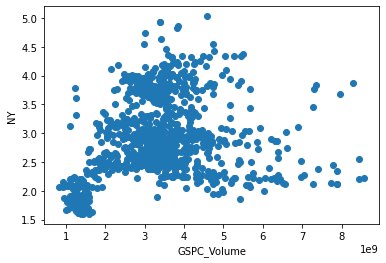

In [16]:
plt.scatter(new_data.GSPC_Volume, new_data.NY)
plt.xlabel('GSPC_Volume')
plt.ylabel('NY')
plt.show()

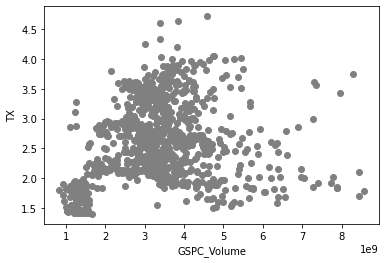

In [17]:
plt.scatter(new_data.GSPC_Volume, new_data.TX, color='gray')
plt.xlabel('GSPC_Volume')
plt.ylabel('TX')
plt.show()

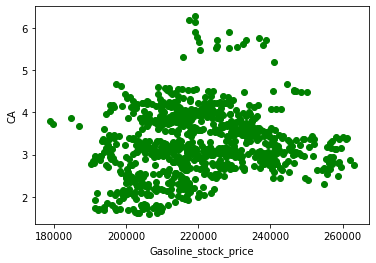

In [11]:
plt.scatter(new_data.Gasoline_stock_price, new_data.CA, color='green')
plt.xlabel('Gasoline_stock_price')
plt.ylabel('CA')
plt.show()

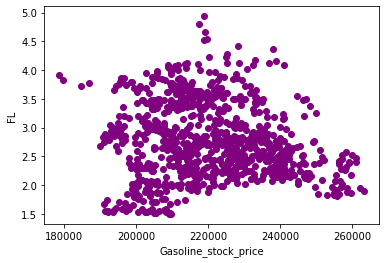

In [12]:
plt.scatter(new_data.Gasoline_stock_price, new_data.FL, color='purple')
plt.xlabel('Gasoline_stock_price')
plt.ylabel('FL')
plt.show()

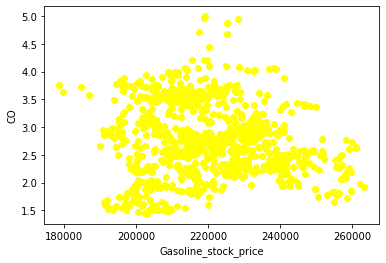

In [14]:
plt.scatter(new_data.Gasoline_stock_price, new_data.CO, color='yellow')
plt.xlabel('Gasoline_stock_price')
plt.ylabel('CO')
plt.show()

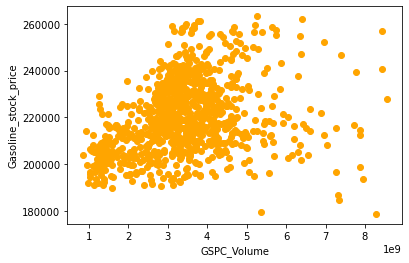

In [15]:
plt.scatter(new_data.GSPC_Volume, new_data.Gasoline_stock_price, color='orange')
plt.xlabel('GSPC_Volume')
plt.ylabel('Gasoline_stock_price')
plt.show()

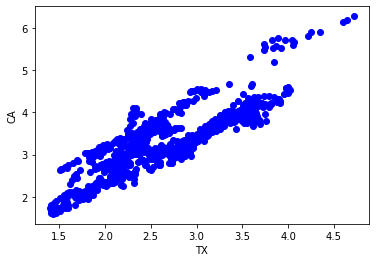

In [19]:
plt.scatter(new_data.TX, new_data.CA, color='blue')
plt.xlabel('TX')
plt.ylabel('CA')
plt.show()

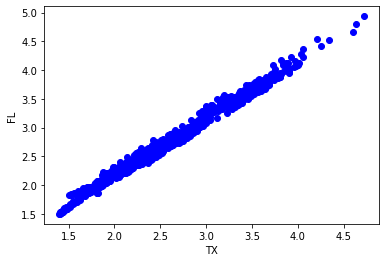

In [22]:
plt.scatter(new_data.TX, new_data.FL, color='blue')
plt.xlabel('TX')
plt.ylabel('FL')
plt.show()